<a href="https://colab.research.google.com/github/nayanammm/remote_hydrometeorological_monitoring_system/blob/master/nivel_para_vazao_manning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalhando com dados Fluviométricos do Córrego da Pedreira 

Os dados de vazão são essenciais para avaliação do balanço hidrológico em bacias hidrográficas. Entretanto, realizar medições fluviométricas diretas periodicamente é um desafio, devido aos custos operacionais. Sendo assim, uma forma indireta de obter dados de vazão é medindo a altura da lâmina d'água e a área da seção transversal do escoamento. A leitura do nível d'água pode ser obtida de maneira automática com  sensores eletrônicos. 

A figura abaixo à direita ilustra um sensor ultrassônico instalado em uma seção canalizada do córrego da Pedreira, um afluente do rio Belém. O sistema de medição registra a leitura da distância entre o sensor e a lâmina d'água (linha vermelha na figura da esquerda abaixo). Os dados são obtidos periodicamente e salvos em um cartão de memória.

<img src="https://drive.google.com/uc?export=view&id=18XqiiHUHq3MoV3koqn0Oq9ggqNTnW-5U" width="300"/> <img src="https://drive.google.com/uc?export=view&id=1NiGpdaX1CgtGZbSxDFo2gf-GNbjd-x8g" width="300"/> 




Com a utilização do sensor ultrassônico, foram realizadas leituras de nível em intervalos de 15 segundos, entre os dias 05/08 e 30/08.
Analisando os dados brutos observam-se alguns dados espúrios, necessitando que os mesmos sejam tratados e filtrados antes de serem utilizandos para os cálculos de vazão. 

**Exercício I:** Organizar os dados de medição de nível, seguindo os seguintes passos:

1. Leitura dos dados de distância (linha vermelha da figura acima à esquerda) do arquivo CSV. O arquivo CSV contém uma coluna para a data e hora (no formado ddmmaaaa HH:MM:SS) e outra coluna com os dados de distância em centímetros. Você pode acessá-lo no link:(https://www.dropbox.com/s/htfwy819slzcxkt/dados_ultrassonico.csv?dl=0). **Nessa seção deverá ser realizado os seguintes procedimentos:**

**a) Criar um Dataframe e nomear o título das colunas de acordo com a lista: ['data_hora','dist_cm']**

**b) Definir a coluna 'data_hora' como o índice do dataframe.**

**c) configurar a  coluna 'data_hora'  como o formato de data padrão: aaaa-mm-dd HH:MM:SS**

2. Filtragem dos dados espúrios (errôneos). Existem algumas medições onde a distância foi registrada como zero e outras medições em que a distância aparece maior do que 100 cm. O filtro deve ser construído para retirar os valores zero e os valores acima de 100 cm. **Nessa seção pode-se identificar quantas linhas foram retiradas do Dataframe**

3. Calcular os valores de nível com base nas medições de distância considerando a distância total entre o sensor e o fundo do canal de 83,80 centímetros (linha verde da figura acima à esquerda). **Nessa seção deve-se criar uma nova coluna no Dataframe intitulada 'dist_cm' com altura da lâmina d'água para cada medição. Além disso, deverá ser calculada a média do nível d'água.**


4. Calcular a Média horária dos dados de nível. Não é para calcular o perfil diário (média horária de todos os dias). É para calcular a média de cada intervalo de 60 minutos entre os dias 22-12-2020 e 22-03-2021. **Nessa seção o/deve-se criar um gráfico das médias horárias ao longo do tempo**

5. Calcular a Média diária dos dados de nível. **Nessa seção deve-se criar um gráfico das médias diárias ao longo do tempo**



### 1. Leitura dos dados da distância do sensor até a lâmina d'água (medidas em campo com o sensor ultrassônico)



In [ ]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import numpy
import pandas
%matplotlib inline  

In [ ]:
from urllib.request import urlretrieve
URL = 'https://www.dropbox.com/s/3e4xgkztofh28vg/nivel_05_08_30_09.csv?dl=1'
urlretrieve(URL, 'nivel_05_08_30_09.csv')


('nivel_05_08_30_09.csv', <http.client.HTTPMessage at 0x7f27fa7e1d30>)

In [ ]:
dateparse = lambda x: pandas.datetime.strptime(x, '%d-%m-%Y')

dados=pandas.read_csv(URL,sep=';',index_col=0, parse_dates=['data'], date_parser=dateparse)

dados[0:3]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


,dist_cm,nivel_cm
data,,
2020-08-05,65.10,18.70
2020-08-05,65.04,18.76
2020-08-05,65.20,18.60


## CONVERTER INDEX IN DATETIME

In [ ]:
#dados['data_hora'].pandas.datetime
dados.index = pandas.to_datetime(dados.index)

In [ ]:
dados

,dist_cm,nivel_cm
data,,
2020-08-05,65.10,18.70
2020-08-05,65.04,18.76
2020-08-05,65.20,18.60
2020-08-05,64.95,18.85
2020-08-05,65.03,18.77
...,...,...
2020-09-30,69.23,14.57
2020-09-30,68.86,14.94
2020-09-30,69.77,14.03


###2.Filtragem dos dados espúrios

In [ ]:
type(dados)

pandas.core.frame.DataFrame

In [ ]:
dados_filtrados = dados.loc[(dados['dist_cm'] > 1.0) & (dados['dist_cm'] < 100.0)]
dados_filtrados

,dist_cm,nivel_cm
data,,
2020-08-05,65.10,18.70
2020-08-05,65.04,18.76
2020-08-05,65.20,18.60
2020-08-05,64.95,18.85
2020-08-05,65.03,18.77
...,...,...
2020-09-30,69.23,14.57
2020-09-30,68.86,14.94
2020-09-30,69.77,14.03


In [ ]:
len(dados)

5070

In [ ]:
len(dados_filtrados)

5010

In [ ]:
print(len(dados)-len(dados_filtrados))

60


3. Cálculo do Nível

In [ ]:
dados_filtrados['nivel_cm'] = 83.80 - dados_filtrados['dist_cm']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dados_filtrados

,dist_cm,nivel_cm
data,,
2020-08-05,65.10,18.70
2020-08-05,65.04,18.76
2020-08-05,65.20,18.60
2020-08-05,64.95,18.85
2020-08-05,65.03,18.77
...,...,...
2020-09-30,69.23,14.57
2020-09-30,68.86,14.94
2020-09-30,69.77,14.03


In [ ]:
dados_filtrados['nivel_cm'].mean()

15.186139720558916

4. Média Horária

In [ ]:
medias = dados_filtrados.resample('1d').mean()

In [ ]:
medias

,dist_cm,nivel_cm
data,,
2020-08-05,65.107778,18.692222
2020-08-06,64.665532,19.134468
2020-08-07,64.131286,19.668714
2020-08-08,NaN,NaN
2020-08-09,NaN,NaN
2020-08-10,68.856042,14.943958
2020-08-11,69.920625,13.879375
2020-08-12,69.569474,14.230526
2020-08-13,67.331474,16.468526


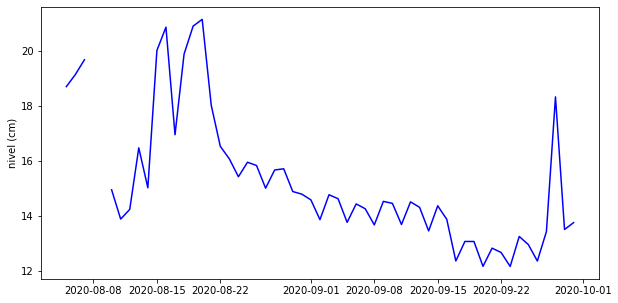

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(medias['nivel_cm'],color='blue')
#plt.xlabel('nivel (cm)')
plt.ylabel('nivel (cm)');

**Exercício II:** Com os dados já tratados, agora pode-se utilizar de métodos empíricos para o cálculo da vazão. Considere que o córrego está canalizado em uma manilha de 1.50 metros de diâmetro, e a declividade é de 1,31%.

Realizar o cálculo da vazão ($Q$) associada ao escoamento no canal circular utilizando os dados horários de nível. Uma aproximação da vazão $Q$ pode ser obtida aplicando a equação de Manning: 

$\displaystyle Q = \ \frac{A}{n}  Rh^{2/3} S^{1/2}$

Sendo que $A$ é a área da seção transversal de fluxo normal à direção do fluxo, $Rh$ é o raio hidráulico, $S$ é a declividade do fundo do canal e $n$ é o coeficiente de rugosidade de Gauckler–Manning. Considere que o valor do coeficiente de Gauckler–Manning é $n = 0.2$ s/m$^{1/3}$.

Para obter a vazão o/a discente deverá realizar o produto da velocidade e da área. 

Observe a figura abaixo e identifique as variáveis: $D$ (diâmetro do tubo), $r$ (raio do tubo), $h$ (altura da lâmina d'água) e $\theta$ (ângulo em relação ao centro do tubo). 

<img src="https://www.dropbox.com/s/zx1xlfbqd16j5m2/wetted-circle_ok.png?dl=1" width="250"/> 

Para proceder com os cálculos sugere-se :

1. Calcular $\theta$ (em radianos) de acordo com as fórmulas abaixo, sendo que $h$ é a altura da lâmina d'água.
2. Cálculo da área molhada
3. Cálculo do perímetro molhado
4. Cálculo do raio hidráulico
5. Cálculo da velocidade média
6. Cálculo da vazão

A seguir são apresentadas algumas equações que podem ser úteis nos cálculos. 

O raio ($r$) é a metade do diâmetro ($D$):

$$r = \frac{D}{2}$$

O ângulo $\theta$ deverá ser calculado em radianos e pode ser obtido de acordo com a equação:

$$\theta = 2 \, \text{arc cos} \left(\frac{r-h}{r} \right)$$

A área da seção transversal do escoamento ($A$) é:

$$A = \frac{r^2 (\theta - \text{sen}\theta)}{2}$$

O perímetro molhado ($P$) é:

$$P = r \theta$$

O raio hidráulico ($R_h$) é:

$$R_h = \frac{A}{P}$$


Sugestão de leitura de [material com as equações](https://www.cedengineering.com/userfiles/Partially%20Full%20Pipe%20Flow%20Calculations.pdf).

**No final do exercício II o/a discente deverá fazer 3 coisas:**

**a) Mostrar um gráfico da vazão horária (m3/s) ao longo do tempo.** (não é o perfil diário de vazão).

**b) Mostrar um histograma da Vazão horária (m3/s).**

**c) Calcular a mediana da Vazão horária (m3/s)**


**Solução:**


In [ ]:
S = numpy.arctan(0.24/18.82)
S

0.012751699861372612

In [ ]:
import numpy

nivel = medias['nivel_cm'].values/100.0

theta = 2*numpy.arccos((0.75-nivel)/0.75)

area = (0.75**2)*(theta-numpy.sin(theta))/2.0

perimetro = 0.75*theta

raio_hidraulico = area/perimetro

vazao =  (area/0.04) * raio_hidraulico**(2/3) * S**(1/2)

vazao_l_s = vazao * 1000

medias['theta'] = theta
medias['area'] = area
medias['perimetro'] = perimetro
medias['raio_hidraulico'] = raio_hidraulico
medias['vazao(m3/s)'] = vazao
medias['vazao(l/s)'] = vazao_l_s

In [ ]:
medias


,dist_cm,nivel_cm,theta,area,perimetro,raio_hidraulico,vazao(m3/s),vazao(l/s)
data,,,,,,,,
2020-08-05,65.107778,18.692222,1.443138,0.126921,1.082353,0.117264,0.085842,85.842210
2020-08-06,64.665532,19.134468,1.460901,0.131325,1.095676,0.119858,0.090126,90.125773
2020-08-07,64.131286,19.668714,1.482129,0.136704,1.111596,0.122979,0.095439,95.438935
2020-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-10,68.856042,14.943958,1.284509,0.091465,0.963382,0.094942,0.053739,53.738625
2020-08-11,69.920625,13.879375,1.236336,0.082054,0.927252,0.088492,0.046000,46.000226
2020-08-12,69.569474,14.230526,1.252403,0.085124,0.939302,0.090625,0.048485,48.484994
2020-08-13,67.331474,16.468526,1.350919,0.105467,1.013189,0.104094,0.065886,65.886069


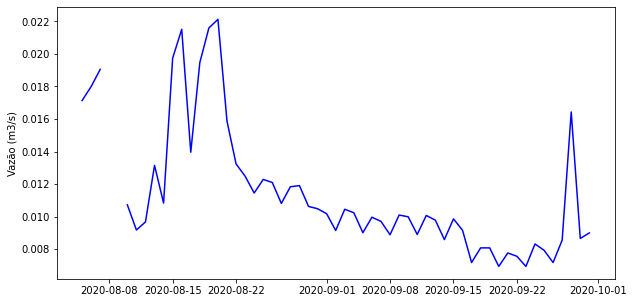

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(medias['vazao(m3/s)'],color='blue')
plt.ylabel('Vazão (m3/s)');

In [ ]:
medias['vazao(m3/s)'].median()

0.010101093415513032

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


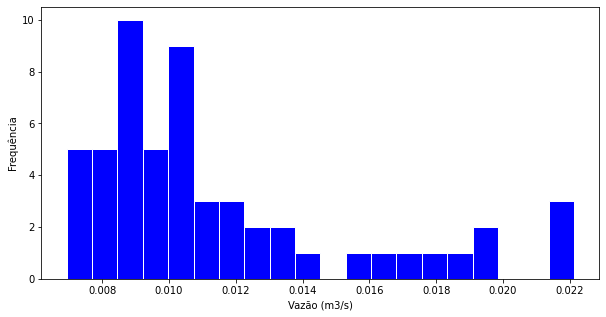

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(medias['vazao(m3/s)'],bins=20,color='blue',histtype='bar',edgecolor='white')
plt.xlabel('Vazão (m3/s)')
plt.ylabel('Frequência');

In [ ]:
type(vazao)

numpy.ndarray

In [ ]:
#medias['vazao(m3/s)'].dropnan

medias['vazao(m3/s)'] = medias['vazao(m3/s)'].dropna()

In [ ]:
medias['vazao(m3/s)']

data
2020-08-05    0.017134
2020-08-06    0.017989
2020-08-07    0.019049
2020-08-08         NaN
2020-08-09         NaN
2020-08-10    0.010726
2020-08-11    0.009181
2020-08-12    0.009677
2020-08-13    0.013150
2020-08-14    0.010836
2020-08-15    0.019737
2020-08-16    0.021510
2020-08-17    0.013960
2020-08-18    0.019470
2020-08-19    0.021593
2020-08-20    0.022122
2020-08-21    0.015864
2020-08-22    0.013241
2020-08-23    0.012487
2020-08-24    0.011453
2020-08-25    0.012289
2020-08-26    0.012099
2020-08-27    0.010815
2020-08-28    0.011840
2020-08-29    0.011908
2020-08-30    0.010630
2020-08-31    0.010489
2020-09-01    0.010181
2020-09-02    0.009153
2020-09-03    0.010456
2020-09-04    0.010242
2020-09-05    0.009017
2020-09-06    0.009966
2020-09-07    0.009711
2020-09-08    0.008889
2020-09-09    0.010101
2020-09-10    0.009994
2020-09-11    0.008908
2020-09-12    0.010075
2020-09-13    0.009786
2020-09-14    0.008592
2020-09-15    0.009866
2020-09-16    0.009169
2020-0

In [ ]:
from google.colab import files
medias.to_csv('vazao_medido.csv')
files.download('vazao_medido.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###COMPARAÇÃO DAS VAZÕES 
###ponto exutório na medição de nível
###dados metereológicos:
* inmet
    
    vs 
    
* simepar

In [ ]:
from urllib.request import urlretrieve
URL = 'https://www.dropbox.com/s/e8k9afa5ozl9bx7/watout.pedreira2_2003_2016.csv?dl=1'
urlretrieve(URL, 'watout.pedreira2_2003_2016.csv')

('watout.pedreira2_2003_2016.csv', <http.client.HTTPMessage at 0x7f4896731b70>)

In [ ]:
vazao_inmet=pandas.read_csv(URL,sep=';',index_col=0)

vazao_inmet[0:3]

NameError: ignored

In [ ]:
yeardatescalendar

In [ ]:
vazao_inmet = vazao_inmet.set_index('Day_Step')
vazao_inmet

In [ ]:
from urllib.request import urlretrieve
URL = 'https://www.dropbox.com/s/zj1ffdt4elwc8q6/watout.pedreira3_2003_2016.csv?dl=1'
urlretrieve(URL, 'watout.pedreira3_2003_2016.csv')

In [ ]:
vazao_simepar=pandas.read_csv(URL,sep=';',index_col=0)

vazao_simepar[0:3]

In [ ]:
vazao_simepar = vazao_simepar.set_index('Day')
vazao_simepar

In [ ]:
plt.figure(figsize=(20,10))
#plt.plot(vazao_inmet['FLOWm^3/s_pedreira_inmet'],color='blue')
plt.plot(vazao_simepar['FLOWm^3/s_pedreira_simepar'],color='blue')
plt.xlabel('Dias');
plt.ylabel('Vazão (m3/s)');